# Remind of the goal of our study

The target of our study is to identify the profile of our target customer and how bank employees can increase the rate of success of the campaign

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
bankdata = pd.read_csv('cleaned_bank_marketing_data.csv')
bankdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,administrative,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,administrative,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,administrative,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45203,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45204,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45205,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45207 entries, 0 to 45206
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45207 non-null  int64 
 1   job        45207 non-null  object
 2   marital    45207 non-null  object
 3   education  45207 non-null  object
 4   default    45207 non-null  object
 5   balance    45207 non-null  int64 
 6   housing    45207 non-null  object
 7   loan       45207 non-null  object
 8   contact    45207 non-null  object
 9   day        45207 non-null  int64 
 10  month      45207 non-null  object
 11  duration   45207 non-null  int64 
 12  campaign   45207 non-null  int64 
 13  pdays      45207 non-null  int64 
 14  previous   45207 non-null  int64 
 15  poutcome   45207 non-null  object
 16  deposit    45207 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Exploratory Analysis

we are plotting the graphs for both categorical and numerical variables to look for any outliers or inapproiate data that have to be removed

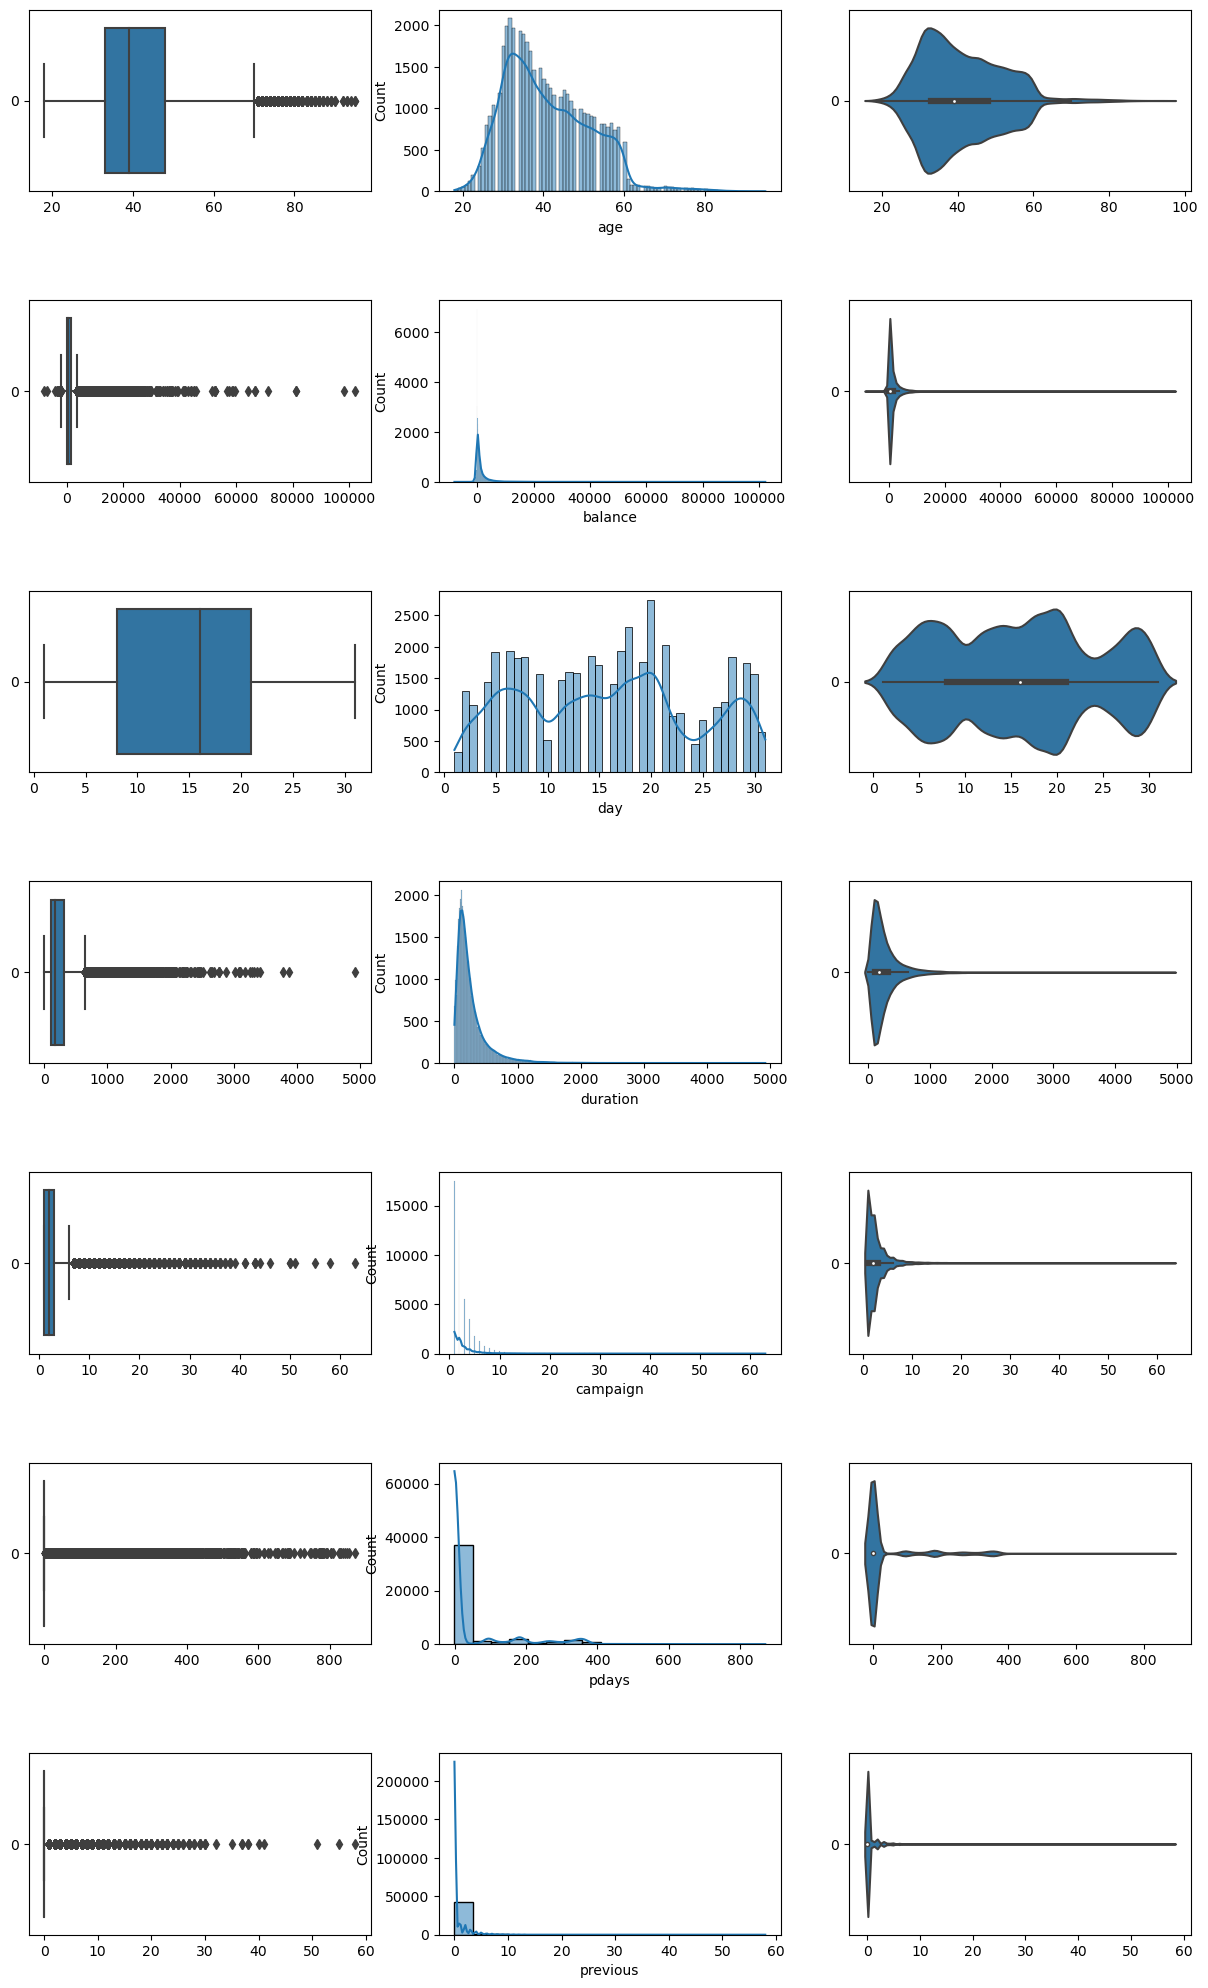

In [4]:
numcols = pd.DataFrame(bankdata[['age','balance','day','duration','campaign','pdays','previous']])
f, axes = plt.subplots(7, 3, figsize=(15,25))
count=0
for var in numcols:
    sb.boxplot(data = numcols[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numcols[var], ax = axes[count,1], kde=True)
    sb.violinplot(data = numcols[var], orient = "h", ax = axes[count,2])
    count+=1
plt.subplots_adjust(hspace=0.6)

In [5]:
#finding the number of rows with -1 and 0 values for 'pdays' and 'previous'

pdays_negative = len(bankdata[bankdata["pdays"]==-1])
previous_zero = len(bankdata[bankdata["previous"]==0])
print("Total number of rows: ", len(bankdata))
print("Number of -1 value in 'pdays' column: ", pdays_negative)
print("Number of 0 value in 'previous' column: ", previous_zero)

Total number of rows:  45207
Number of -1 value in 'pdays' column:  36951
Number of 0 value in 'previous' column:  36951


In [6]:
#finding the % of rows having -1 and 0 values for 'pdays' and 'previous'

format_pdays_negative = "{:.2f}".format(pdays_negative/len(bankdata)*100)
format_previous_zero = "{:.2f}".format(previous_zero/len(bankdata)*100)
print("Percentage of -1 value in 'pdays' column: ", format_pdays_negative)
print("Percentage of 0 value in 'previous' column: ", format_previous_zero)

Percentage of -1 value in 'pdays' column:  81.74
Percentage of 0 value in 'previous' column:  81.74


81.74% of the rows in 'pdays' and 'previous' columns are made up of unknown values. Hence, we may consider removing them as these columns might not be helpful.

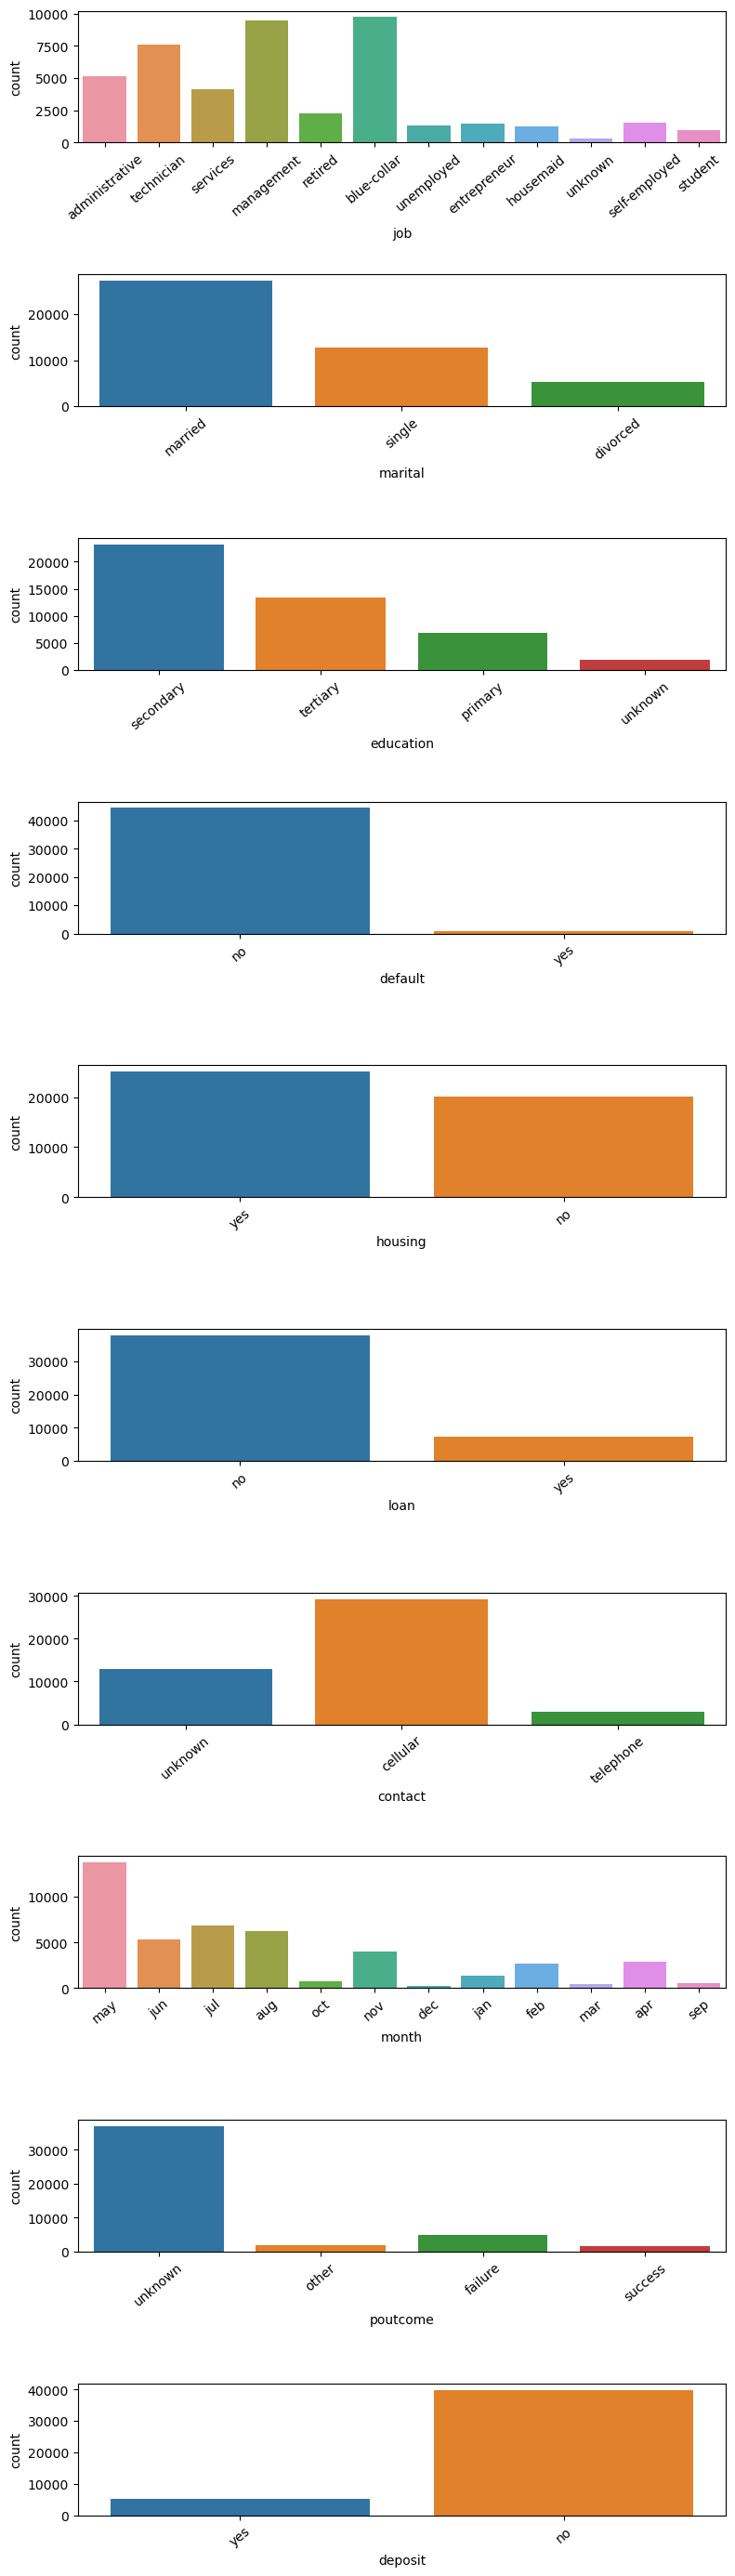

In [7]:
#plotting the countplot for categorical variables

catcols = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']
f, axes = plt.subplots(10, 1, figsize=(9,35))
count=0
for var in catcols:
    sb.countplot(x=var, data=bankdata, ax=axes[count])
    axes[count].set_xticklabels(axes[count].get_xticklabels(),rotation=40)
    count+=1
plt.subplots_adjust(hspace=1.0)

We will now proceed with removing irrelevant columns that are not helpful in our study.

'day'      - last contact day of the month is not useful.  

'month'    - last contact month of the year is not useful.  

'pdays'    - Number of days since the customer was last contacted from previous campaign for the customer is not useful. Most of the values are -1 which means that the customer has never been contacted in the previous campaign or the data is unknown. The distribution of values in the columns is heavily skewed and imbalance.  

'previous' - Number of contacts performed before this campaign for the customer is not useful. Most of the values are 0 which means that the customer has never been contacted before this campaign. The distribution of values in the columns is heavily skewed and imbalance.  

'contact' - type of 'contact' is not really relevant and important in increasing the success rate of the campaign. 

Conclusion:  
Columns to be dropped are 'day', 'month', 'pdays', 'previous' and 'contact'

# Drop Useless Columns

In [8]:
bankdata.drop(columns=['day', 'month', 'pdays', 'previous', 'contact'], inplace=True)
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome,deposit
0,59,administrative,married,secondary,no,2343,yes,no,1042,1,unknown,yes
1,56,administrative,married,secondary,no,45,no,no,1467,1,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,unknown,yes
4,54,administrative,married,tertiary,no,184,no,no,673,2,unknown,yes


In [9]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
bankdata.describe()

,age,balance,duration,campaign
count,45207.000000,45207.000000,45207.000000,45207.000000
mean,40.936315,1362.246798,258.178202,2.763576
std,10.618940,3044.825898,257.530264,3.097614
min,18.000000,-8019.000000,1.000000,1.000000
25%,33.000000,72.000000,103.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000
75%,48.000000,1428.000000,319.000000,3.000000
max,95.000000,102127.000000,4918.000000,63.000000


# Univariate and Multivariate Analysis

We are using Statistical and Visualization tools here to get some ideas and understand the dataset. Our goal here is to analyse if there are some relation between the variables. We will first convert the categorical variable of 'deposit' into numerical variable.

In [11]:
#converting the categorical 'deposit' column to numeric

dictionary = {'yes':1, 'no':0}
numeric = bankdata['deposit'].map(dictionary)
bankdata['deposit_num'] = numeric
bankdata

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome,deposit,deposit_num
0,59,administrative,married,secondary,no,2343,yes,no,1042,1,unknown,yes,1
1,56,administrative,married,secondary,no,45,no,no,1467,1,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,1389,1,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,579,1,unknown,yes,1
4,54,administrative,married,tertiary,no,184,no,no,673,2,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,59,management,married,tertiary,no,138,yes,yes,162,2,failure,no,0
45203,37,management,married,tertiary,no,1428,no,no,333,2,unknown,no,0
45204,34,blue-collar,single,secondary,no,1475,yes,no,1166,3,other,no,0
45205,57,blue-collar,married,secondary,no,668,no,no,508,4,unknown,no,0


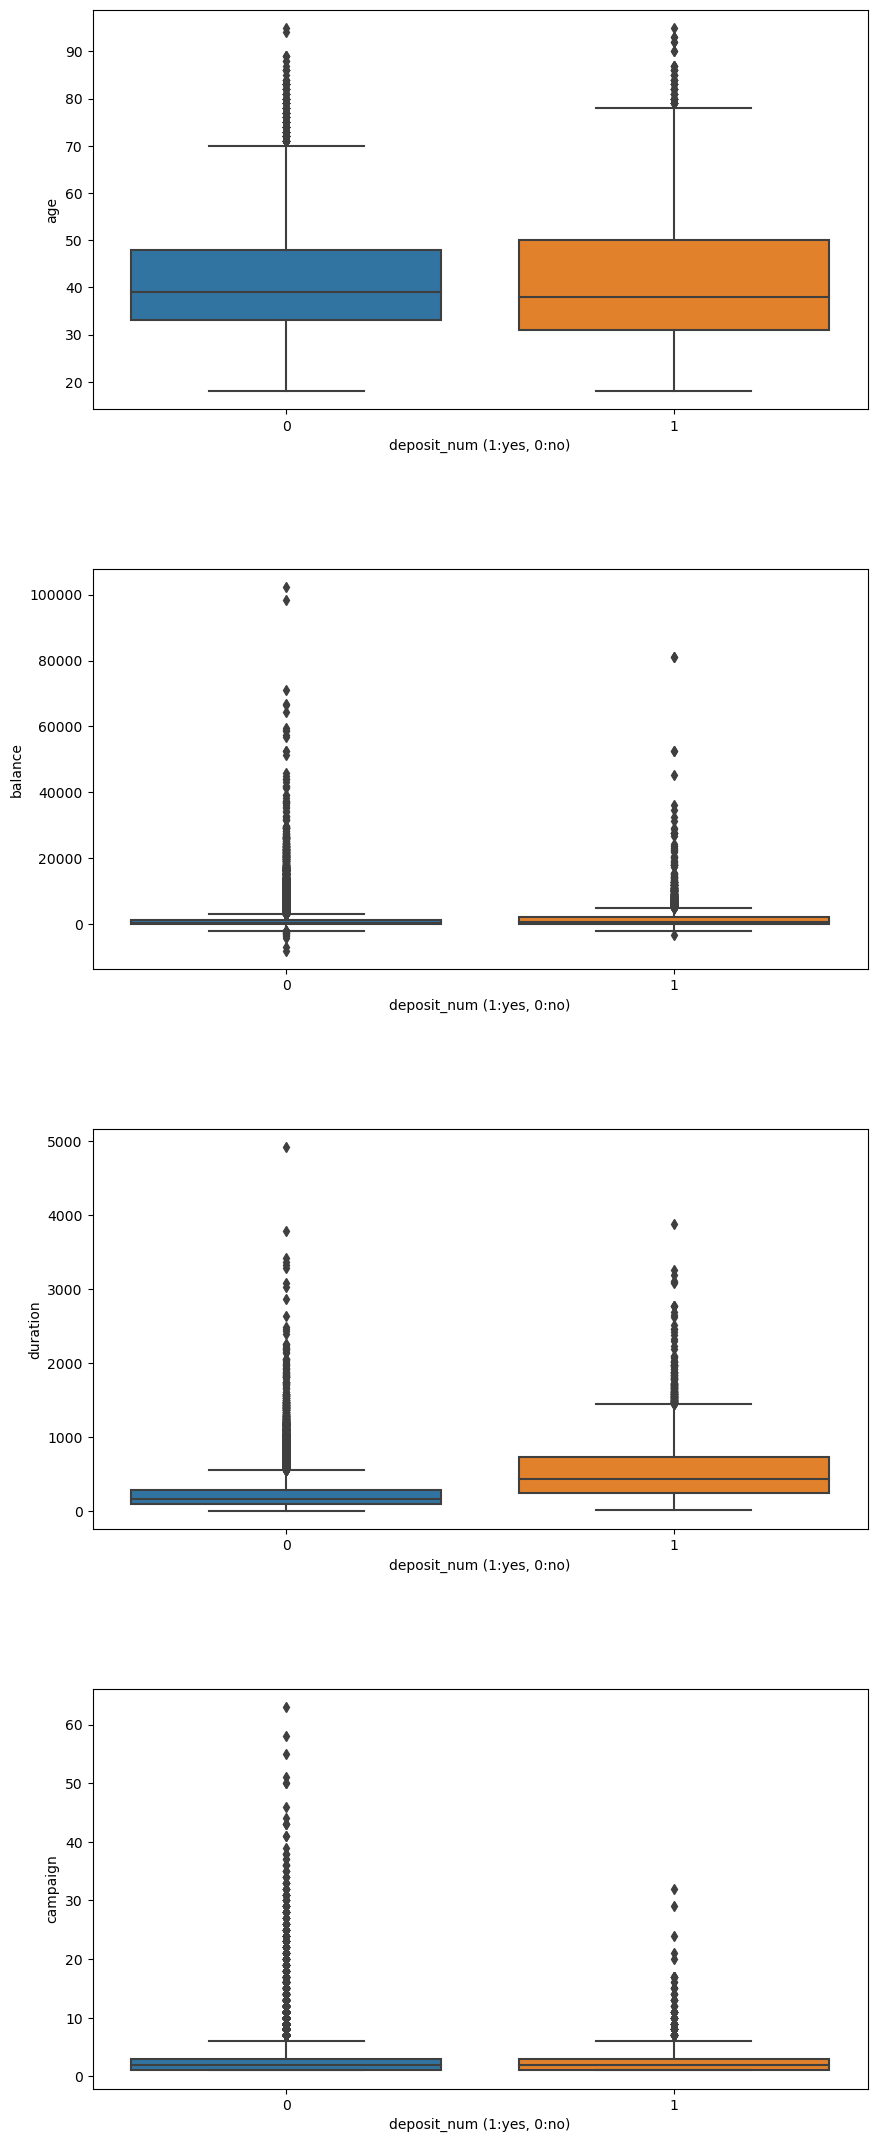

In [12]:
#plotting the boxplots for numerical variables
#comparing between success deposit and unsuccess deposit

numcols = pd.DataFrame(bankdata[['age','balance','duration','campaign']])
f, axes = plt.subplots(4, 1, figsize=(10,27))
count=0
for var in numcols:
    sb.boxplot(x='deposit_num', y=var, data = bankdata, ax=axes[count])
    axes[count].set_xlabel('deposit_num (1:yes, 0:no)')
    count+=1
plt.subplots_adjust(hspace=0.4)

Observations:


There are no huge difference between the variables 'age', 'balance' and 'campaign' for the customers that made and do not made deposit.

For the variable 'duration', the average duration of last contact for customers who made deposit is higher than that of customers who do not made deposit by inspection.

Hence, we might expect that the longer the duration, the higher the chance for a customer to made deposit.

In [13]:
#finding the minimum and maximum values for each numerical columns

numcols = pd.DataFrame(bankdata[['age','balance','duration','campaign','deposit_num']])
deposit_data = numcols[numcols['deposit_num']==1]
min_values = deposit_data.min()
max_values = deposit_data.max()
print("Minimun value: ")
print(min_values)
print()
print("Maximum value: ")
print(max_values)

Minimun value: 
age              18
balance       -3058
duration          8
campaign          1
deposit_num       1
dtype: int64

Maximum value: 
age               95
balance        81204
duration        3881
campaign          32
deposit_num        1
dtype: int64


The range with the highest count for 'age' is: [33, 38)
The range with the highest count for 'balance' is: [-58, 442)
The range with the highest count for 'duration' is: [208, 258)
The range with the highest count for 'campaign' is: [1, 3)


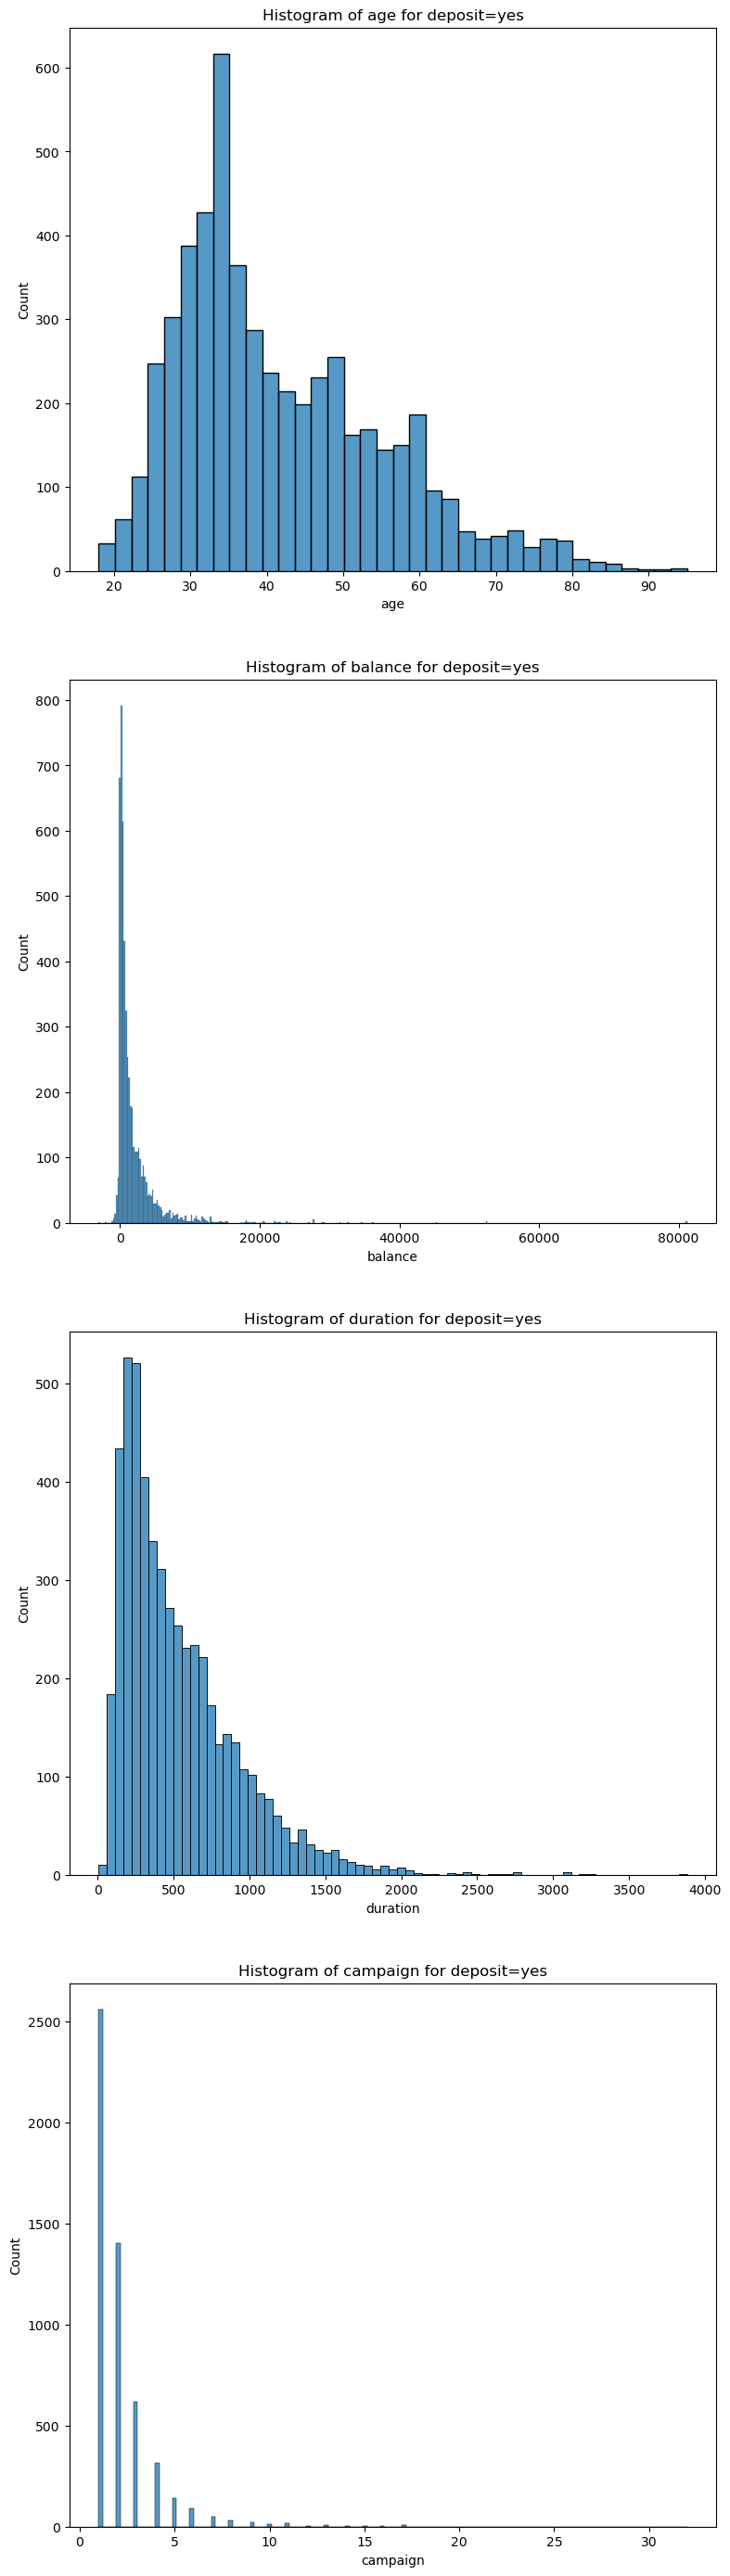

In [14]:
#plotting the histogram for each numerical variables
#finding the intervals which have the highest count for each numerical columns

numcols = pd.DataFrame(bankdata[['age','balance','duration','campaign']])
bin_intervals = {
    'age': range(18, 95, 5),
    'balance': range(-3058, 81204, 500),
    'duration': range(8, 3881, 50),
    'campaign': range(1, 32, 2)
}
f, axes = plt.subplots(4, 1, figsize=(9,35))
count = 0
for var in numcols:
    sb.histplot(data = deposit_data[var], ax=axes[count])
    axes[count].set_title(f'Histogram of {var} for deposit=yes')
    bin_labels = pd.cut(deposit_data[var], bins=bin_intervals[var], right=False)
    mode_interval = bin_labels.mode().iloc[0]
    print(f"The range with the highest count for '{var}' is:", mode_interval)
    count+=1

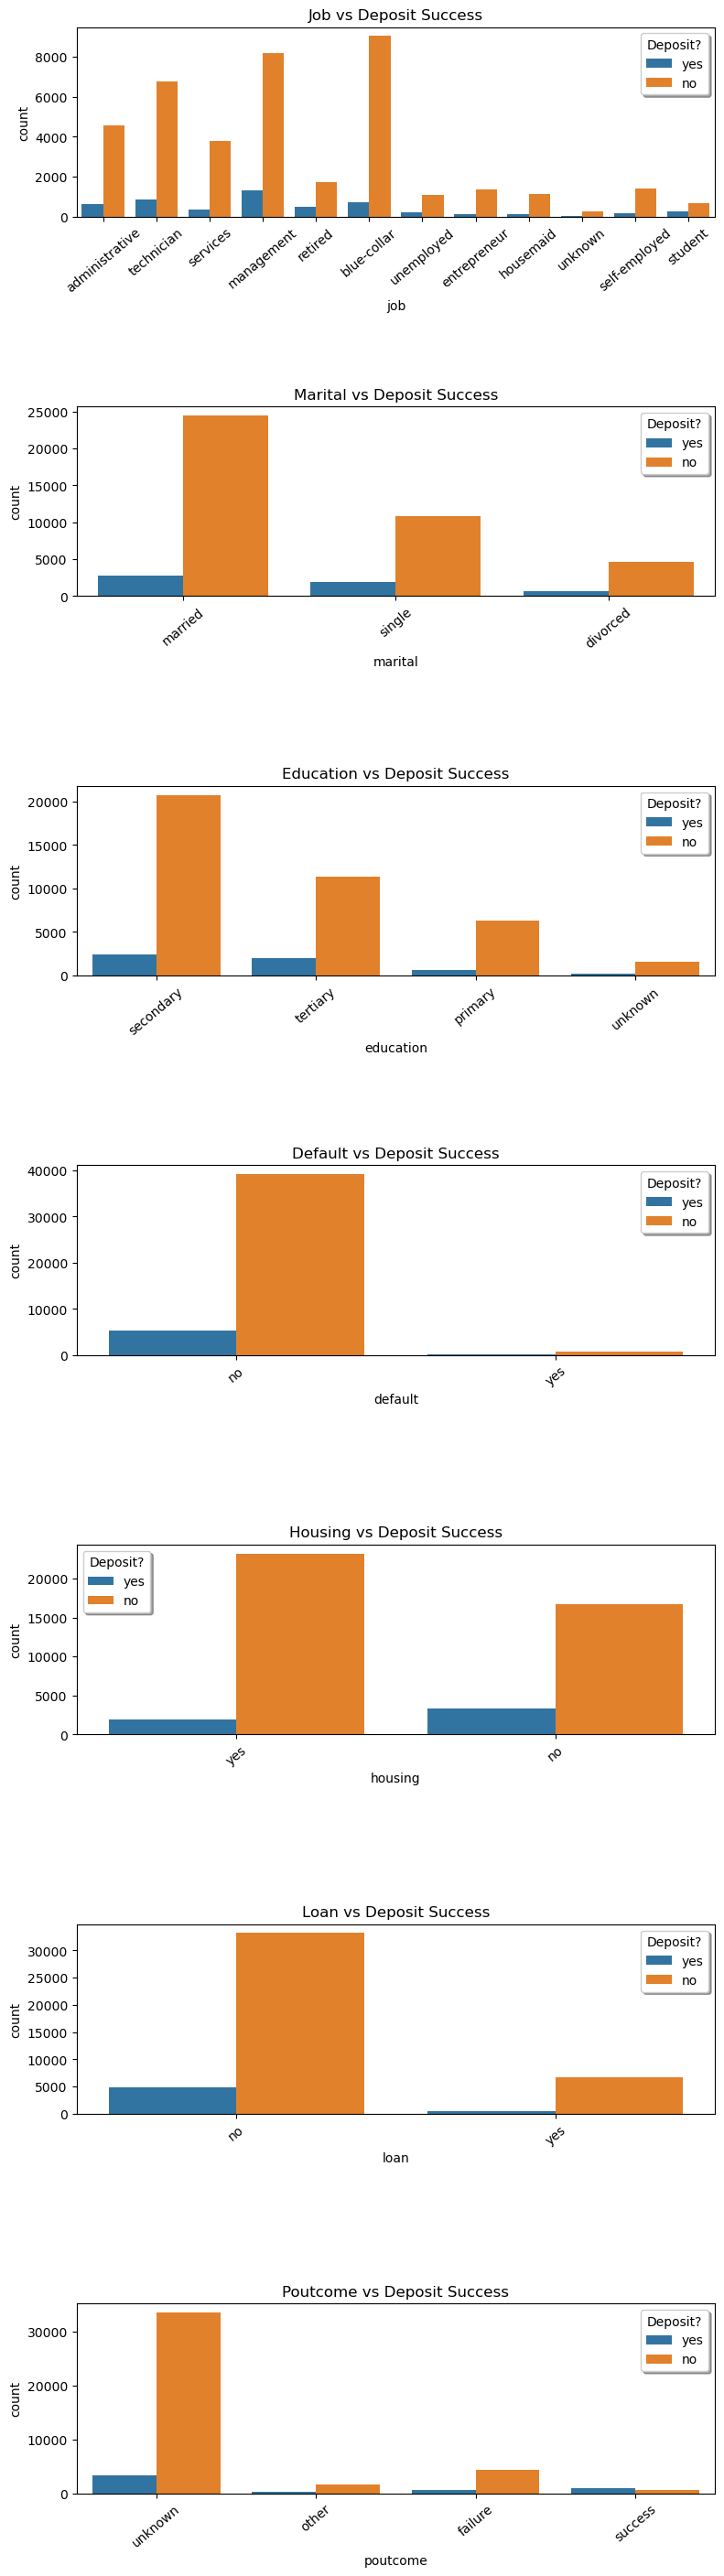

In [15]:
#plotting count plot for each categorical variable
#comparing between success deposit and unsuccess deposit

catcols = ['job','marital','education','default','housing','loan','poutcome']
f, axes = plt.subplots(7, 1, figsize=(9,35))
count = 0;
for var in catcols:
    sb.countplot(x=var, hue='deposit', data=bankdata, ax=axes[count])
    axes[count].set_title(f'{var.capitalize()} vs Deposit Success')
    axes[count].set_xticklabels(axes[count].get_xticklabels(), rotation = 40)
    axes[count].legend(title='Deposit?', ncol=1, fancybox=True, shadow=True) 
    count+=1
plt.subplots_adjust(hspace=1.0)

From inspection, we might guess that the profile of the target customer might be:  
1. with 'age' in the interval 33 to 38
2. with 'balance' in the interval -58 to 442
3. working as management in'job' 
4. married 'marital status'
5. with secondary 'education'
6. no 'default'
7. no 'housing'
8. no 'loan'

We might also guess that it is best for the bank employees to:
1. call to the customer with 'duration' around 208 to 258 seconds
2. call the customer 1 to 3 times during the 'campaign'

These are the criteria that we guess what our future customers profile would be. However, these guesses might be incorrect and have to be further investigated through model learning.

# Split Dataset

Our goal is to predict the profile of our target customer. Hence we are going to split the dataset into customer criteria dataset and non-customer criteria dataset

In [16]:
customer_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'deposit_num']
non_customer_columns = ['duration', 'campaign', 'poutcome', 'deposit_num']
customerdata = bankdata[customer_columns]
noncustomerdata = bankdata[non_customer_columns]

# Export CSV

In [17]:
bankdata.to_csv("analysed_bank_marketing_data.csv", index=False)
customerdata.to_csv("customer_bank_marketing_data.csv", index=False)
noncustomerdata.to_csv("non_customer_bank_marketing_data.csv", index=False)